# Python Excercise to Run A Regression Model
#Created on Sun Nov 26, 2017 by Author: Serena Ren

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import os 

1) Read the excel sheets and store them as pandas dataframes.

In [3]:
#Set working directory
path = 'C:\\Users\\Serena\\Desktop\\Projects\\PythonExercise Regression\\PythonExercise'    #Need to update path accordingly
os.chdir(path)
#Read excel sheets to pandas dataframes
xlsx_file = pd.ExcelFile('InputData.xlsx')
Geogs = xlsx_file.parse('Geogs')
Products = xlsx_file.parse('Products')
Prodhier =xlsx_file.parse('Prodhier')
Geoghier = xlsx_file.parse('Geoghier')
Data = xlsx_file.parse('Data')
MediaData = xlsx_file.parse('MediaData')

2) Print top 5 rows of each pandas dataframe into a csv file.

In [4]:
Geogs.head().to_csv('Geogs_top5.csv', index=False)
Products.head().to_csv('Products_top5.csv', index=False)
Prodhier.head().to_csv('Prodhier_top5.csv', index=False)
Geoghier.head().to_csv('Geoghier_top5.csv', index=False)
Data.head().to_csv('Data_top5.csv', index=False)
MediaData.head().to_csv('MediaData_top5.csv', index=False)

Note: My understanding of the question is to create a .csv file for each dataframe. If want to write to a single .csv file,
please refer to the codes in the next cell.

3) Identify number of rows, columns, column names and datatypes in each dataframe. Save them to a .csv file.

In [5]:
dfs= [Geogs, Products,Prodhier, Geoghier, Data, MediaData]             # Define a list of dataframes
df_names = ['Geogs', 'Products', 'Prodhier', 'Geoghier','Data', 'MediaData']       # Define a list of dataframe names
# Write out to a  .csv file
with open('Summaries of Dataframes.csv', 'w') as file:
    for i in range(len(dfs)):
        file.write('Dataframe ' + df_names[i] + '\n')
        file.write('The number of rows is: ' + str(len(dfs[i])) +'\n')
        file.write('The number of columns is: '+ str(len(dfs[i].columns)) +'\n')
        file.write('The Datatype of Dataframe ' + df_names[i] + ' Columns are: \n')
        for j in range(len(dfs[i].columns)):
            file.write(str(dfs[i].columns[j]) + '    ' + str(type(dfs[i].columns[j])) + '\n')
        file.write('\n')

4) Run correlation on numeric columns and save as a .csv file.

In [6]:
Data_merged = pd.merge(Data, MediaData, on ='WEEK')     # Merge two dataframes on key='WEEK',as both Data and MediaData are in market=1
df=Data_merged.select_dtypes(exclude=['object','datetime64[ns]'])      # Exclude all non-numeric variables
correlation = df.corr()                                              # Calculate correlation table
correlation.to_csv('Correlation Table.csv')                         # save to a .csv file
#correlation                            # Uncomment this line to view correlation

Note: Without knowing the meaning of each variable, I include all numeric variables (int and float) in Data and MediaData and get a 113 by 113 table. Even though there are many 'NaN' in the dataframe, the correlation table leaves out missing values during calculation. 

5) Create a summary table of the modeled dataframe that contains sum, mean, median, range, min, max, nmiss, count

In [7]:
#df = df[df['PRICE']!=0]                                              # Uncomment this line if treating 0 as NaN
df_summary = df.describe(include='all')
df_summary.loc['range'] = df_summary.loc['max']-df_summary.loc['min']   
df_summary.loc['sum']=df.sum()
df_summary.loc['nmiss']=df.isnull().sum()
df_summary = df_summary.drop(labels=['25%', '75%'], axis=0)
df_summary = df_summary.rename(index={'50%': 'Median'})
#df_summary.to_csv('Summary of Model Data.csv')                     # Uncomment this line if want to save it to a .csv file
df_summary

,UNI,VOL,DOL,PA,BVOL,VELOCITY,APPBX,ADWOFPBX,AFDPBX,AFWODPBX,...,DFVM9,OFVM3,YFVM6,DFVM10,DFVM18,DFVM20,SFVM10,SFVM19,TFVM21,SFVM11
count,3.060000e+02,1.294200e+04,3.060000e+02,3060.000000,1.294200e+04,12942.0,306.0,306.0,306.0,306.0,...,12942.000000,12942.000000,12942.000000,12942.000000,12942.000000,12942.000000,12942.000000,12942.000000,12942.000000,12942.000000
mean,5.727865e+04,2.125956e+03,5.727865e+04,0.784076,5.734591e+02,1.0,0.0,0.0,0.0,0.0,...,0.098642,0.812691,0.143658,0.059221,0.764514,0.678092,0.922805,1.055802,4.860918,0.207879
std,3.518760e+04,1.032223e+04,3.518760e+04,0.203692,1.448925e+03,0.0,0.0,0.0,0.0,0.0,...,0.772217,7.388812,0.738861,0.334333,4.028209,3.572851,5.216165,5.695232,26.870270,1.784582
min,2.567599e+03,0.000000e+00,2.567599e+03,0.123659,0.000000e+00,1.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Median,6.249754e+04,0.000000e+00,6.249754e+04,0.834382,0.000000e+00,1.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.383610e+05,1.383610e+05,1.383610e+05,1.000000,1.268668e+04,1.0,0.0,0.0,0.0,0.0,...,7.798175,79.020000,6.413937,2.341628,21.987426,19.501914,44.750634,37.836305,199.000000,17.891509
range,1.357934e+05,1.383610e+05,1.357934e+05,0.876341,1.268668e+04,0.0,0.0,0.0,0.0,0.0,...,7.798175,79.020000,6.413937,2.341628,21.987426,19.501914,44.750634,37.836305,199.000000,17.891509
sum,1.752727e+07,2.751412e+07,1.752727e+07,2399.271553,7.421708e+06,12942.0,0.0,0.0,0.0,0.0,...,1276.627133,10517.850000,1859.225784,766.437374,9894.341578,8775.861300,11942.944733,13664.190050,62910.000000,2690.375408
nmiss,1.263600e+04,0.000000e+00,1.263600e+04,9882.000000,0.000000e+00,0.0,12636.0,12636.0,12636.0,12636.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Note: Without information on whether 0 means missing value or not, I consider 'NaN' and blank as missing values, and 0 means real value. Otherwise should specify df = df[df['PRICE']!=0]. As the example in code, 'PRICE' = 0 means free product.

6) Generate 2 plots VOL vs PRICE, VOL vs SEAS

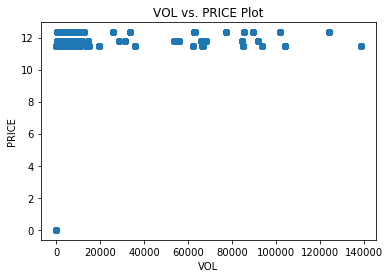

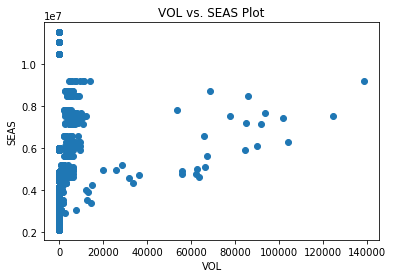

In [8]:
# a.'VOL vs. PRICE Plot
plt.scatter(df['VOL'],  df['PRICE'])
plt.title('VOL vs. PRICE Plot')
plt.xlabel('VOL')
plt.ylabel('PRICE')
plt.show()
# b.'VOL vs. SEAS Plot
plt.scatter(Data['VOL'], Data['SEAS'])
plt.title('VOL vs. SEAS Plot')
plt.xlabel('VOL')
plt.ylabel('SEAS')
plt.show()

Note: The scatter plots are as shown above. Note that there are many data points in 'VOL' that are 0 or very small, other than these values, there seems to be a linear relationship between 'VOL' and 'PRICE', 'VOL' and 'SEAS'.

7) Creat a new variable MCPRICE, representing mean centered price.

In [11]:
df.loc[:,('MCPRICE')]=df['PRICE']-df['PRICE'].mean()
#df['MCPRICE']                               # Uncomment this line to view 'MCPRICE'

8) Run a regression model with the specified modeling statement.

In [12]:
model_MCPRICE = smf.ols("""VOL ~ XMAS + EASTER + NEWYEAR + seasindx + 
                             Fit1881 + Fit1882 + Fit1883 + Fit1884
                             + VTFVM1 + YFVM1 + TFVM15 + VTFVM6 + VTFVM4 + DFVM5 + DFVM3 + SFVM1 + 
                             SFVM14 + TFVM18 + OFVM1 + TFVM10 + SFVM2 + TFVM14 + SFVM3 + DFVM4 + 
                             DFVM8 + SFVM17 + TFVM9 + TFVM16 + YFVM4 + VTFVM2 + YFVM2 + SFVM18 + 
                             TFVM11 + DFVM15 + VTFVM7 + DFVM21 + DFVM1 + DFVM12 + DFVM6 + SFVM15 + 
                             DFVM23 + SFVM4 + YFVM5 + TFVM19 + OFVM2 + DFVM16 + SFVM20 + TFVM12 + 
                             VTFVM5 + SFVM5 + DFVM14 + TFVM22 + PFVM1 + SFVM6 + DFVM22 + PFVM2 + VTFVM3 + 
                             YFVM3 + VTFVM8 + DFVM11 + SFVM12 + SFVM13 + SFVM7 + TFVM17 + DFVM24 + DFVM13 + 
                             DFVM2 + DFVM7 + SFVM16 + SFVM8 + TFVM20 + DFVM19 + SFVM21 + TFVM13 + SFVM9 +
                             DFVM17 + DFVM9 + OFVM3 + YFVM6 + DFVM10 + DFVM18 + DFVM20 + SFVM10 + SFVM19 + 
                             TFVM21 + SFVM11 + MCPRICE""", data=df).fit()
print model_MCPRICE.summary()                  # If run the code using python3, add parenthesis after print

                            OLS Regression Results                            
Dep. Variable:                    VOL   R-squared:                       0.193
Model:                            OLS   Adj. R-squared:                  0.188
Method:                 Least Squares   F-statistic:                     39.99
Date:                Mon, 27 Nov 2017   Prob (F-statistic):               0.00
Time:                        14:48:18   Log-Likelihood:            -1.3659e+05
No. Observations:               12942   AIC:                         2.733e+05
Df Residuals:                   12864   BIC:                         2.739e+05
Df Model:                          77                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.004e+04   6943.981     -1.446      0.1

Note: From the OLS regression, the Adj. R-squared is only 0.1880, which indicates a linear model doesn't fit the data well. In addition, the p-values show that a lot of variables are not significant.

9) Write the model summary to a .csv file.

In [13]:
# Refer to http://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.RegressionResults.html
result_df = pd.DataFrame()
result_df = pd.DataFrame({'coef': model_MCPRICE.params,
                         'std': model_MCPRICE.bse,
                         'tvals': model_MCPRICE.tvalues,
                         'pvals': model_MCPRICE.pvalues})
with open('model_MCPRICE_summary.csv','w') as file:
   file.write('The R-Squared of the model is ' + str(model_MCPRICE.rsquared) + '\n')
   file.write('The Adj. R-Squared of the model is ' + str(model_MCPRICE.rsquared_adj)+ '\n')
   result_df.to_csv(file)
   file.close()

10) Run the above model statement using PRICE in place of MCPRICE

In [14]:
model_PRICE = smf.ols("""VOL ~ XMAS + EASTER + NEWYEAR + seasindx + 
                             Fit1881 + Fit1882 + Fit1883 + Fit1884
                             + VTFVM1 + YFVM1 + TFVM15 + VTFVM6 + VTFVM4 + DFVM5 + DFVM3 + SFVM1 + 
                             SFVM14 + TFVM18 + OFVM1 + TFVM10 + SFVM2 + TFVM14 + SFVM3 + DFVM4 + 
                             DFVM8 + SFVM17 + TFVM9 + TFVM16 + YFVM4 + VTFVM2 + YFVM2 + SFVM18 + 
                             TFVM11 + DFVM15 + VTFVM7 + DFVM21 + DFVM1 + DFVM12 + DFVM6 + SFVM15 + 
                             DFVM23 + SFVM4 + YFVM5 + TFVM19 + OFVM2 + DFVM16 + SFVM20 + TFVM12 + 
                             VTFVM5 + SFVM5 + DFVM14 + TFVM22 + PFVM1 + SFVM6 + DFVM22 + PFVM2 + VTFVM3 + 
                             YFVM3 + VTFVM8 + DFVM11 + SFVM12 + SFVM13 + SFVM7 + TFVM17 + DFVM24 + DFVM13 + 
                             DFVM2 + DFVM7 + SFVM16 + SFVM8 + TFVM20 + DFVM19 + SFVM21 + TFVM13 + SFVM9 +
                             DFVM17 + DFVM9 + OFVM3 + YFVM6 + DFVM10 + DFVM18 + DFVM20 + SFVM10 + SFVM19 + 
                             TFVM21 + SFVM11 + PRICE""", data=df).fit()
print model_PRICE.summary()             # If run the code using python3, add parenthesis after print

                            OLS Regression Results                            
Dep. Variable:                    VOL   R-squared:                       0.193
Model:                            OLS   Adj. R-squared:                  0.188
Method:                 Least Squares   F-statistic:                     39.99
Date:                Mon, 27 Nov 2017   Prob (F-statistic):               0.00
Time:                        14:48:26   Log-Likelihood:            -1.3659e+05
No. Observations:               12942   AIC:                         2.733e+05
Df Residuals:                   12864   BIC:                         2.739e+05
Df Model:                          77                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1903.0226    445.227      4.274      0.0

Note: With PRICE instead of MCPRICE, the estimation results don't change much. Model still doesn't fit well.

11) Write the model summary to a separate csv file.

In [15]:
result_df = pd.DataFrame()
result_df = pd.DataFrame({'coef': model_PRICE.params,
                         'std': model_PRICE.bse,
                         'tvals': model_PRICE.tvalues,
                         'pvals': model_PRICE.pvalues})
with open('model_PRICE_summary.csv','w') as file:
   file.write('The R-Squared of the model is ' + str(model_PRICE.rsquared) + '\n')
   file.write('The Adj. R-Squared of the model is ' + str(model_PRICE.rsquared_adj)+ '\n')
   result_df.to_csv(file)
   file.close()

  12) Do an analysis of the variables and identify the variables that can make the final model. Explain and interpret.

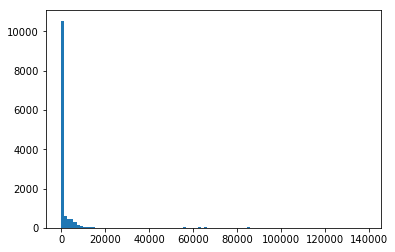

In [16]:
# Without details about the variables, it's hard to tell which variables should be considered from an economics point of view.
# First we check if the dependent variable 'VOL'is normally distributed by plotting the histogram.
plt.hist(df['VOL'].dropna(), bins=100)
plt.show()

Note: As we can see, the distribution is very skewed, there are too many values that are 0. Delete the data associated with VOL==0, so we model only the senario under which VOL is positive.

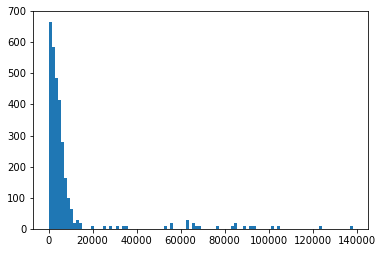

In [17]:
df_nozero = df[df['VOL']!=0]
plt.hist(df_nozero['VOL'].dropna(), bins=100)
plt.show()

Note: The distribution of 'VOL' is still right skewed, need to transform 'VOL', consider taking logs.

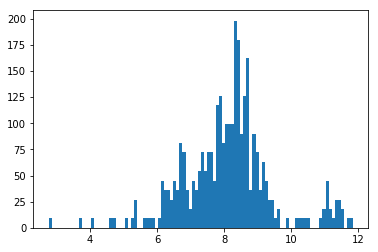

In [18]:
log_vol = np.log(df_nozero['VOL'])
plt.hist(log_vol.dropna(), bins=100)
plt.show()

Note: 'log.vol' now is much closer to a normal distribution and thus more appropriate to be treated as the dependent variable. 

In [20]:
model_logy_nozero = smf.ols("""log_vol ~ XMAS + EASTER + NEWYEAR + seasindx + 
                             Fit1881 + Fit1882 + Fit1883 + Fit1884
                             + VTFVM1 + YFVM1 + TFVM15 + VTFVM6 + VTFVM4 + DFVM5 + DFVM3 + SFVM1 + 
                             SFVM14 + TFVM18 + OFVM1 + TFVM10 + SFVM2 + TFVM14 + SFVM3 + DFVM4 + 
                             DFVM8 + SFVM17 + TFVM9 + TFVM16 + YFVM4 + VTFVM2 + YFVM2 + SFVM18 + 
                             TFVM11 + DFVM15 + VTFVM7 + DFVM21 + DFVM1 + DFVM12 + DFVM6 + SFVM15 + 
                             DFVM23 + SFVM4 + YFVM5 + TFVM19 + OFVM2 + DFVM16 + SFVM20 + TFVM12 + 
                             VTFVM5 + SFVM5 + DFVM14 + TFVM22 + PFVM1 + SFVM6 + DFVM22 + PFVM2 + VTFVM3 + 
                             YFVM3 + VTFVM8 + DFVM11 + SFVM12 + SFVM13 + SFVM7 + TFVM17 + DFVM24 + DFVM13 + 
                             DFVM2 + DFVM7 + SFVM16 + SFVM8 + TFVM20 + DFVM19 + SFVM21 + TFVM13 + SFVM9 +
                             DFVM17 + DFVM9 + OFVM3 + YFVM6 + DFVM10 + DFVM18 + DFVM20 + SFVM10 + SFVM19 + 
                             TFVM21 + SFVM11 + PRICE""", data=df_nozero).fit()
print model_logy_nozero.summary()             # If run the code using python3, add paren

                            OLS Regression Results                            
Dep. Variable:                log_vol   R-squared:                       0.464
Model:                            OLS   Adj. R-squared:                  0.459
Method:                 Least Squares   F-statistic:                     100.9
Date:                Mon, 27 Nov 2017   Prob (F-statistic):               0.00
Time:                        14:49:15   Log-Likelihood:                -4259.6
No. Observations:                3060   AIC:                             8573.
Df Residuals:                    3033   BIC:                             8736.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.1271     10.658      1.138      0.2

Note: After transformation, the model fits better as , but withing missing data issue and lack of significants of some estimates, we keep independent variables that are significant at 1% level.

In [21]:
# Print out variables that are significant at 1% level
print result_df[result_df['pvals']<0.1].index
#result_df[result_df['pvals']<0.1]              #Uncomment to view the complete results

Index([u'Intercept', u'EASTER', u'seasindx', u'Fit1881', u'Fit1882',
       u'Fit1883', u'Fit1884', u'VTFVM6', u'VTFVM4', u'TFVM10', u'SFVM2',
       u'SFVM18', u'DFVM15', u'VTFVM7', u'SFVM15', u'TFVM19', u'VTFVM5',
       u'VTFVM3', u'DFVM11', u'SFVM13', u'SFVM7', u'TFVM17', u'DFVM24',
       u'DFVM13', u'DFVM2', u'DFVM7', u'SFVM16', u'SFVM8', u'TFVM20', u'YFVM6',
       u'DFVM10', u'DFVM18', u'DFVM20', u'SFVM10', u'SFVM19', u'TFVM21',
       u'SFVM11', u'PRICE'],
      dtype='object')


In [22]:
#Check correlation coefficents of these variables to see if multicolinearly is an issue.
df_new = df_nozero[['VOL','XMAS', 'NEWYEAR', 'seasindx', 'Fit1884', 'VTFVM1', 'VTFVM4',
       'YFVM4', 'VTFVM2', 'YFVM2', 'VTFVM5', 'SFVM6', 'DFVM22', 'YFVM3',
       'SFVM12', 'DFVM24', 'YFVM6', 'DFVM18', 'DFVM20', 'SFVM19','TFVM21', 'SFVM11']]
#df_new.corr()       # Uncomment this line to view the correlation table

Note: From the correlation table, the variables are weakly correlated,thus no multicolinearly issue.

In [23]:
logy_nozero = smf.ols(""" log_vol~ XMAS+ NEWYEAR+ seasindx+ Fit1884+ VTFVM1+ VTFVM4+YFVM4+ 
                VTFVM2+ YFVM2+ VTFVM5+ SFVM6+ DFVM22+ YFVM3+ SFVM12+ DFVM24+ YFVM6+ DFVM18+ DFVM20+ SFVM19+
                TFVM21+ SFVM11""", data=df_nozero).fit()
print logy_nozero.summary()      

                            OLS Regression Results                            
Dep. Variable:                log_vol   R-squared:                       0.448
Model:                            OLS   Adj. R-squared:                  0.444
Method:                 Least Squares   F-statistic:                     123.2
Date:                Mon, 27 Nov 2017   Prob (F-statistic):               0.00
Time:                        14:49:29   Log-Likelihood:                -4304.6
No. Observations:                3060   AIC:                             8651.
Df Residuals:                    3039   BIC:                             8778.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.2839      0.085     73.826      0.0

Note: This model 'logy_nozero' now has a decent Adj. R-squared, AIC,BIC and except for SFVM19, all other variables are significant. Prob(Omnibus) is 0.0000, F-statistic is also significant indicating overall the model is fitted to the data.  Durbin-Watson is between 0 and 2, indicating there is positive auto-correlation in errors.This is usually found in time series data, without knowing the exact meaning of each variable, it's hard to model it in a more advanced way and the interpretation here is only statistical.
#The end.